# Practical No. 4

## Decision Treee

**Theory:**<br>
The ID3 (Iterative Dichotomiser 3) algorithm is a popular decision tree algorithm used for classification tasks. It constructs a decision tree by recursively partitioning the data based on features and their associated attribute values. ID3 selects the best attribute at each step based on the information gain criterion.

Here's a brief description of the ID3 algorithm:

1. Working Principle: ID3 builds a decision tree by splitting the data based on the feature that provides the most information gain. The goal is to create a tree that classifies the instances as accurately as possible by using features that best discriminate between different classes.

2. Attribute Selection: ID3 uses the concept of information gain to select the best attribute for splitting the data. Information gain measures the reduction in entropy (or increase in information) that results from splitting the data on a particular attribute. The attribute with the highest information gain is chosen as the splitting criterion at each step.

3. Tree Construction: ID3 starts with the root node and recursively splits the data based on the selected attribute until a stopping condition is met. Each internal node represents a test on an attribute, and the branches represent the attribute values. The leaf nodes of the tree represent the class labels or the final decision.

4. Stopping Conditions: Several stopping conditions can be used to prevent overfitting or unnecessary tree growth. Common stopping conditions include reaching a maximum depth for the tree, having a minimum number of instances per leaf node, or when all instances at a node belong to the same class.

5. Handling Categorical and Numerical Features: ID3 is primarily designed for categorical features. However, it can also handle numerical features by discretizing them into multiple categories or using techniques like binary splits.

6. Evaluation: Decision trees can be evaluated using various metrics, such as accuracy, precision, recall, F1-score, and others. Additionally, techniques like cross-validation can be used to estimate the model's performance on unseen data.

7. Handling Missing Values and Overfitting: ID3 may struggle with missing values in the data. Various techniques can be used to handle missing values, such as imputation or treating missing values as a separate category. Overfitting can be mitigated by pruning techniques, such as post-pruning (reducing the size of the tree after construction) or pre-pruning (stopping tree growth early based on certain conditions).

8. Implementation: The ID3 algorithm can be implemented using libraries such as NumPy and Pandas in Python. It involves recursively building the decision tree by selecting the best attribute at each step and handling the splitting and termination conditions.

Decision trees, including the ID3 algorithm, are interpretable and can capture non-linear relationships and interactions between features. They are widely used in various fields, including machine learning, data mining, and pattern recognition. However, decision trees can be sensitive to small changes in the data and prone to overfitting if not properly controlled.

### ID3

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


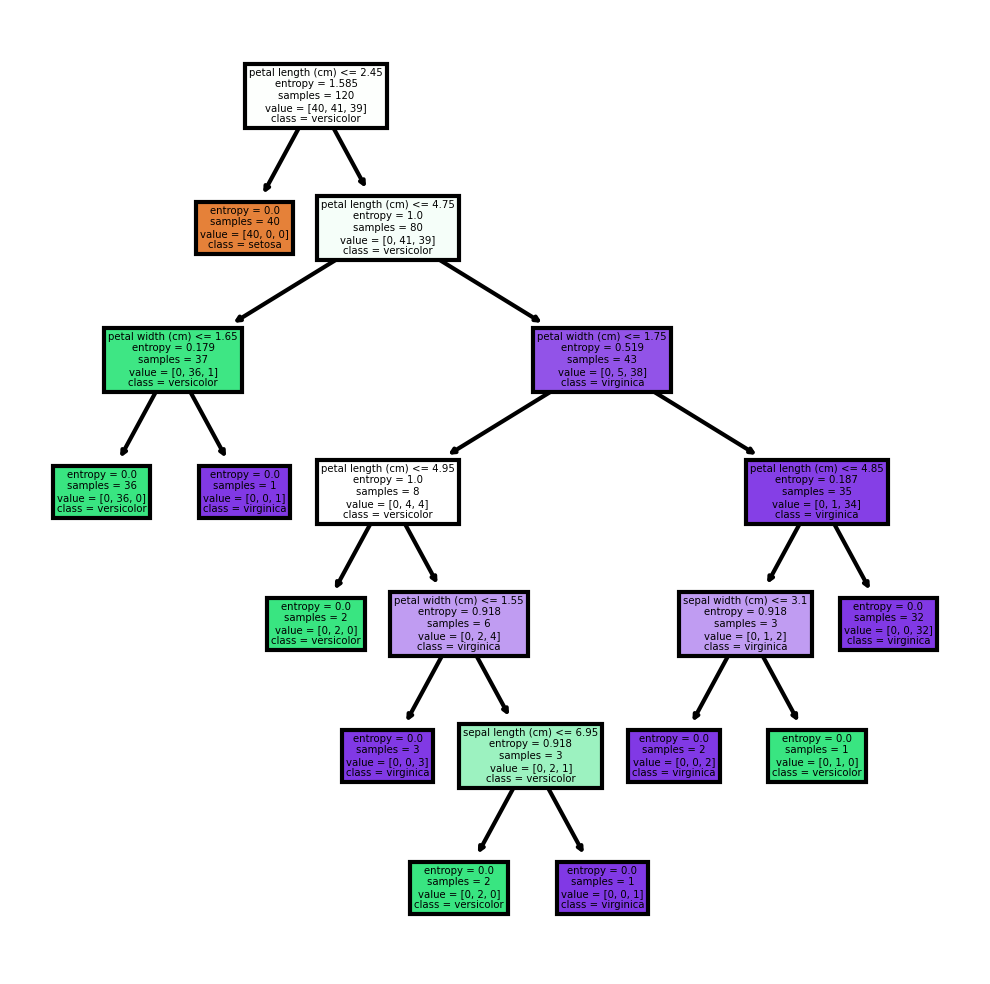

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Prepare the data
X = data
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Visualize the decision tree using Pandas
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(model, feature_names=feature_names, class_names=iris.target_names, filled=True)
plt.show()


### C4.5
**Theory:**
C4.5 is a decision tree algorithm and an extension of the ID3 (Iterative Dichotomiser 3) algorithm. It was developed by Ross Quinlan and is widely used for classification tasks in machine learning. C4.5 builds decision trees by recursively partitioning the data based on features and their associated attribute values, similar to ID3. However, C4.5 introduces several enhancements to handle both categorical and numerical features and handle missing values in the data.

The main improvements introduced by C4.5 include:

1. Handling Numerical Features: Unlike ID3, which primarily handles categorical features, C4.5 can handle numerical features directly. It achieves this by discretizing numerical features into multiple categories, allowing them to be used effectively in the decision tree construction process.

2. Attribute Selection Measure: C4.5 uses the concept of information gain ratio as the attribute selection measure, which addresses the bias of information gain towards attributes with a large number of distinct values. The information gain ratio takes into account the number of branches produced by an attribute, allowing for a more fair comparison of attributes with different numbers of values.

3. Handling Missing Values: C4.5 incorporates mechanisms to handle missing values in the data. It allows instances with missing attribute values to be propagated down the tree based on available attribute values, ensuring that these instances are appropriately classified.

4. Pruning: C4.5 includes a pruning step to avoid overfitting the decision tree to the training data. Pruning involves removing branches or subtrees from the tree that do not improve the overall accuracy on unseen data, thus improving the generalization capability of the model.

By addressing the limitations of ID3, C4.5 provides more robust and flexible decision tree construction. It is widely used in various applications, including data mining, pattern recognition, and classification tasks. The algorithm has been influential in the development of subsequent decision tree algorithms and has contributed to the advancement of machine learning techniques.

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


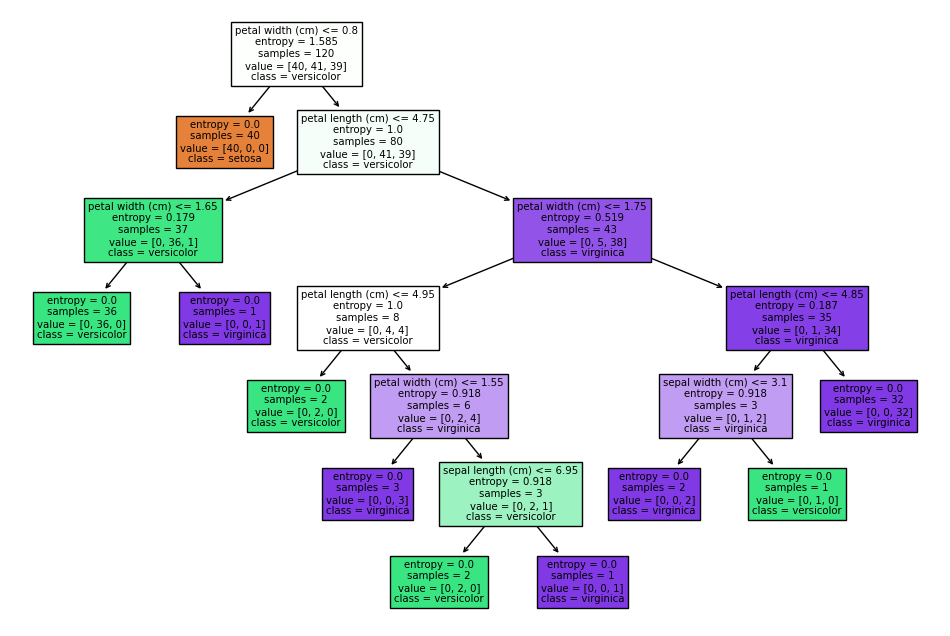

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Prepare the data
X = data
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier with C4.5 algorithm
model = DecisionTreeClassifier(criterion='entropy', splitter='best')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Visualize the decision tree using Matplotlib
plt.figure(figsize=(12, 8))
plt.title("Decision Tree")
plot_tree(model, feature_names=feature_names, class_names=iris.target_names, filled=True)
plt.savefig("decision_tree.png")
plt.show()


### Gini
**Theory:**
In the context of decision trees, the Gini impurity or Gini index is a measure of impurity used to evaluate the quality of splits during the construction of the decision tree. It helps in determining the optimal feature and split point to divide the data into subsets that are as pure as possible.

Here's how the Gini index is used in the context of decision trees:

1. Starting at the root node: When constructing a decision tree, the Gini index is calculated for the initial dataset at the root node. It measures the impurity of the entire dataset before any splits are made.

2. Evaluating potential splits: For each potential feature and split point, the dataset is divided into two or more subsets. The Gini index is then calculated for each subset separately.

3. Computing the Gini index: To calculate the Gini index for a particular subset, the following steps are taken:

   a. Compute the proportion (probability) of each class in the subset by dividing the count of instances belonging to that class by the total number of instances in the subset.

   b. Square the probabilities for each class.

   c. Sum up the squared probabilities.

   d. Subtract the sum from 1 to obtain the Gini index for the subset.

4. Selecting the best split: The Gini index is used as a criterion to evaluate the quality of each potential split. The split that results in the lowest Gini index is considered the best split, as it minimizes the impurity in the resulting subsets.

5. Recursively constructing the tree: The process of evaluating potential splits and selecting the best one is repeated for each child node, creating a tree structure. This process continues until a stopping criterion is met, such as reaching a maximum depth or having nodes with pure classes.

The Gini index ranges from 0 to 1, where 0 represents a perfectly pure node (all instances belong to the same class), and 1 represents a completely impure node (instances are evenly distributed across different classes). The goal of the decision tree algorithm is to minimize the Gini index by making splits that result in pure or predominantly pure subsets.

By using the Gini index as a measure of impurity, decision trees can make effective splits and create a tree structure that best separates the different classes in the dataset. This enables accurate classification of new instances based on the learned decision rules and conditions in the tree.

In summary, the Gini index in the context of decision trees quantifies the impurity of subsets of data and is used to evaluate the quality of splits during the construction of the decision tree. It helps in determining the optimal structure of the tree by minimizing impurity and creating subsets with homogeneous class labels.

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


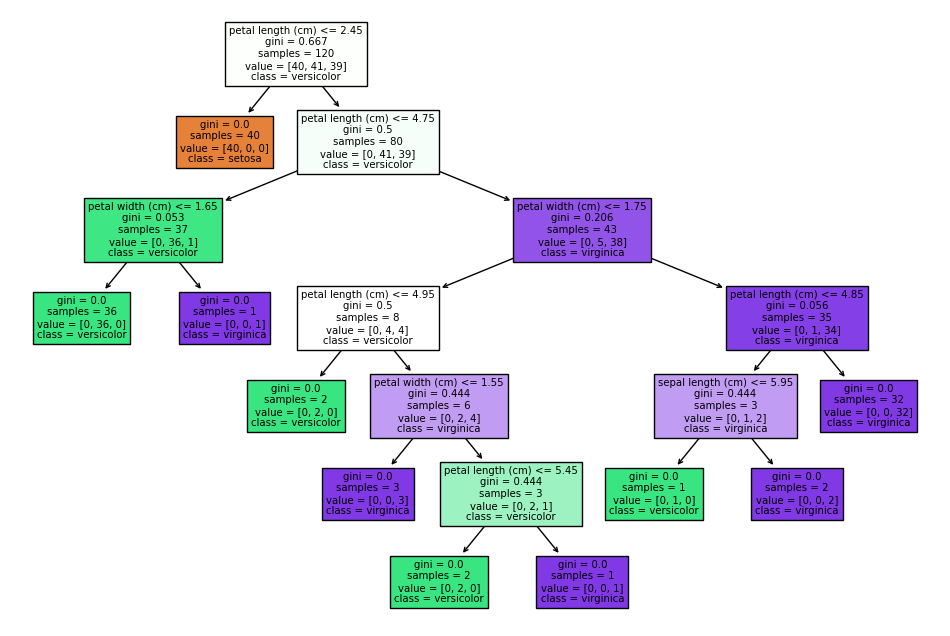

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Prepare the data
X = data
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier with Gini impurity criterion
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, class_names=iris.target_names, filled=True)
plt.show()


### Naive Bayes Classifier
**Theory:**<br>
The Naive Bayes classifier is a popular machine learning algorithm used for classification tasks. It is based on the principles of Bayes' theorem and assumes that features are independent of each other given the class variable. Despite this "naive" assumption, the algorithm can be effective in many real-world scenarios.

The Naive Bayes classifier calculates the probability of a given instance belonging to a particular class based on the observed feature values. It works in the following steps:

1. Training Phase: The algorithm learns from a labeled training dataset, which consists of instances with known class labels and their corresponding feature values. It estimates the prior probability of each class label by calculating the proportion of instances belonging to each class.

2. Feature Independence Assumption: Naive Bayes assumes that all features are independent of each other given the class variable. Although this assumption may not always hold in practice, it simplifies the calculation and allows for efficient training and prediction.

3. Likelihood Calculation: For each feature in the dataset, Naive Bayes calculates the likelihood probability of observing a particular feature value given a specific class label. It estimates this probability by counting the occurrences of each feature value within each class.

4. Posterior Probability Calculation: Using Bayes' theorem, the Naive Bayes classifier combines the prior probabilities and likelihood probabilities to calculate the posterior probability of each class label given the observed feature values. The class label with the highest posterior probability is assigned to the instance.

5. Classification: Once the Naive Bayes classifier has calculated the posterior probabilities for each class label, it selects the class label with the highest probability as the predicted class for the instance being classified.

Naive Bayes is particularly useful for text classification tasks, such as spam detection or sentiment analysis. It can handle large feature spaces efficiently and works well even with limited training data. However, it may struggle with features that are highly correlated or violate the independence assumption.

In summary, the Naive Bayes classifier is a probabilistic machine learning algorithm that leverages Bayes' theorem and assumes feature independence to make predictions. It is widely used for classification tasks, especially in situations where the data contains a large number of features or when working with text data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Prepare the data
X = data
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
